In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import pandasql as ps
pysql = lambda q: ps.sqldf(q, globals())


# Loading data 
df = pd.read_json('data/world_bank_projects.json')
print(df.columns)
print(df['countryshortname'][:10])
print(df.shape)

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')
0              Ethiopia
1               Tunisia
2                Tuvalu
3    Yemen, Republic of
4               Lesotho
5

In [2]:
# 1: Find the 10 countries with most projects

set_countries = df['countryshortname'].unique()
print(set_countries.shape)
print(df.shape)

df_CountriesWithMostProjects = df[['countryshortname', 'project_name']].groupby(['countryshortname'], as_index=False).count().sort_values(by='project_name', ascending=False)
df_CountriesWithMostProjects.rename(columns = {'project_name':'NumOfProjects'}, inplace = True)

print("Top 10 countries with most projects:")
print(df_CountriesWithMostProjects[:10])

(118,)
(500, 50)
Top 10 countries with most projects:
       countryshortname  NumOfProjects
23                China             19
45            Indonesia             19
112             Vietnam             17
44                India             16
115  Yemen, Republic of             13
73                Nepal             12
8            Bangladesh             12
69              Morocco             12
70           Mozambique             11
1                Africa             11


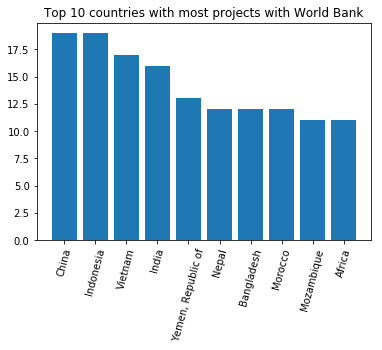

In [3]:
plt.bar(df_CountriesWithMostProjects['countryshortname'][:10], df_CountriesWithMostProjects['NumOfProjects'][:10])
plt.title("Top 10 countries with most projects with World Bank")
plt.xticks(rotation=75)
plt.show()

In [4]:
# 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

dict_themes = {}

for row in df:
    major_project_themes = df['mjtheme_namecode']
    for list_of_themes in major_project_themes:
        for themeitem in list_of_themes:
            key = themeitem['code']
            name = themeitem['name']
            
            if key in dict_themes:
                dict_themes[key]['count']+=1
                if dict_themes[key]['name'] == '':
                    dict_themes[key]['name'] = name
            else:
                dict_themes[key]= {'count':1, 'name':name} 

print(dict_themes)  


df_majorThemes = pd.DataFrame.from_dict(dict_themes, orient='index').sort_values(by=['count'], ascending=False)

print('\nTop 10 Major Project Themes:\n')
print(df_majorThemes[:10])

{'8': {'count': 10500, 'name': 'Human development'}, '11': {'count': 12500, 'name': 'Environment and natural resources management'}, '1': {'count': 1900, 'name': 'Economic management'}, '6': {'count': 8400, 'name': 'Social protection and risk management'}, '5': {'count': 3850, 'name': 'Trade and integration'}, '2': {'count': 9950, 'name': 'Public sector governance'}, '7': {'count': 6500, 'name': 'Social dev/gender/inclusion'}, '4': {'count': 7300, 'name': 'Financial and private sector development'}, '10': {'count': 10800, 'name': 'Rural development'}, '9': {'count': 2500, 'name': 'Urban development'}, '3': {'count': 750, 'name': 'Rule of law'}}

Top 10 Major Project Themes:

    count                                          name
11  12500  Environment and natural resources management
10  10800                             Rural development
8   10500                             Human development
2    9950                      Public sector governance
6    8400         Social protection 

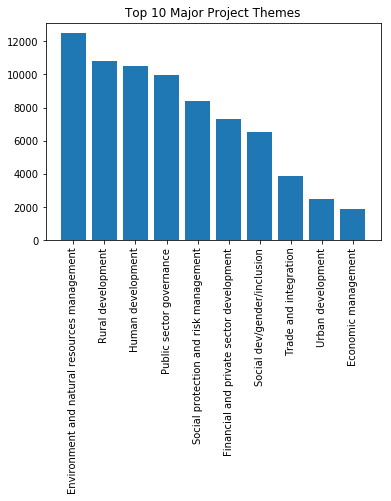

In [5]:
plt.clf()
plt.bar(df_majorThemes['name'][:10], df_majorThemes['count'][:10])
plt.title("Top 10 Major Project Themes")
plt.xticks(rotation=90)
plt.show()

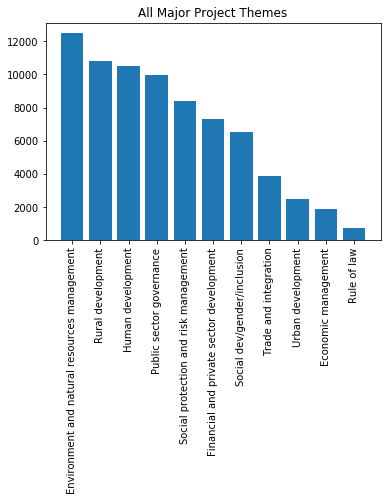

In [6]:
plt.clf()
plt.bar(df_majorThemes['name'], df_majorThemes['count'])
plt.title("All Major Project Themes")
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

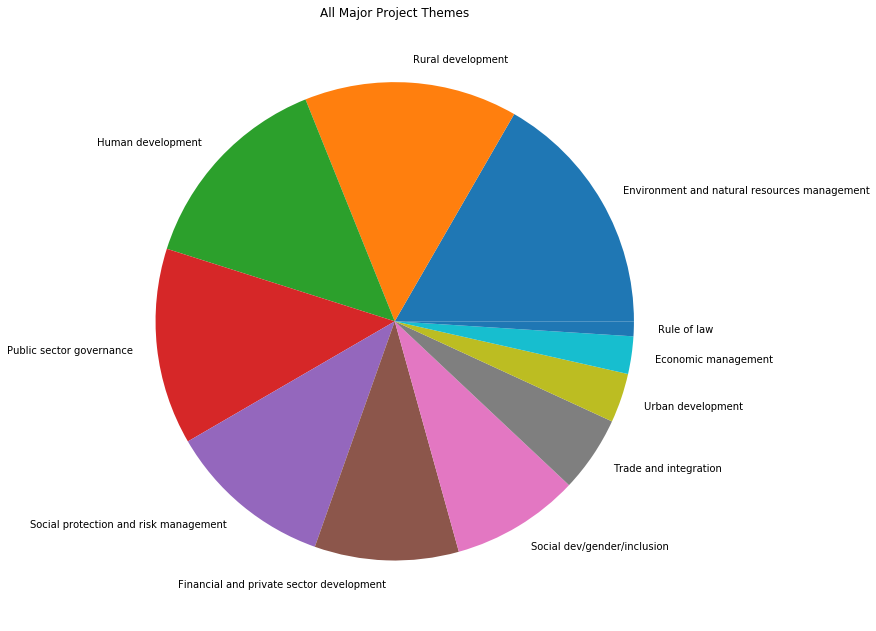

In [7]:
plt.clf()
fig = plt.figure(figsize=(11,11))
plt.pie(df_majorThemes['count'], labels=df_majorThemes['name'])
plt.title("All Major Project Themes")
plt.show()

In [8]:
#3 Creating new dataframe with the missing names in df filled in for major project themes (column 'mjtheme_namecode')

df_namesFilled = pd.DataFrame()
df_namesFilled = df.copy(deep=True)

for list_of_themes in df_namesFilled['mjtheme_namecode']:
    for themeitem in list_of_themes:
        key = themeitem['code']

        if themeitem['name'] == '':
            themeitem['name'] = dict_themes[key]['name']


# Testing whether dataframe properly filled
for list_of_themes in df_namesFilled['mjtheme_namecode'][:5]:
    print(list_of_themes)
    
print("\nOriginal dataframe:\n")
for list_of_themes in df['mjtheme_namecode'][:5]:
    print(list_of_themes)

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '11', 'name': 'Environment and natural resources management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '7', 'name': 'Social dev/gender/inclusion'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '4', 'name': 'Financial and private sector development'}]

Original dataframe:

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '2'